In [1]:
import dspy
import os
from dotenv import load_dotenv
load_dotenv()

c:\Users\htbqn\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


True

# Config llm

In [2]:
turbo = dspy.Google(model= "gemini-1.5-flash",api_key=os.getenv('GOOGLE_API_KEY')) 
colbertv2_wiki17_abstracts = dspy.ColBERTv2(url='http://20.102.90.50:2017/wiki17_abstracts')
dspy.settings.configure(lm=turbo, rm=colbertv2_wiki17_abstracts)

In [6]:
turbo.inspect_history()

''

In [3]:
from dspy.datasets import HotPotQA

# Load the dataset.
dataset = HotPotQA(train_seed=1, train_size=20, eval_seed=2023, dev_size=50, test_size=0)

# Tell DSPy that the 'question' field is the input. Any other fields are labels and/or metadata.
trainset = [x.with_inputs('question') for x in dataset.train]
devset = [x.with_inputs('question') for x in dataset.dev]

len(trainset), len(devset)

(20, 50)

In [7]:
AI = dspy.ChainOfThought("english -> Vietnamese")
AI(english="How are you")

Prediction(
    rationale='English: How are you\nReasoning: Let\'s think step by step in order to translate "How are you" into Vietnamese. We can break down the phrase into two parts: "How" and "are you". "How" translates to "Sao" in Vietnamese. "Are you" translates to "bạn có khỏe không". Combining these, we get "Sao bạn có khỏe không".',
    Vietnamese='Sao bạn có khỏe không'
)

In [4]:
class data:
    def __init__(self, question, answer, gold_titles=""):
        self.question = question
        self.answer = answer
        self.gold_titles = gold_titles
train_example: data = trainset[0]
print(f"Question: {train_example.question}")
print(f"Answer: {train_example.answer}")

Question: At My Window was released by which American singer-songwriter?
Answer: John Townes Van Zandt


In [ ]:
dev_example: data = devset[18]
train_example: data = trainset[0]
print(f"Question: {dev_example.question}")
print(f"Answer: {dev_example.answer}")
print(f"Relevant Wikipedia Titles: {dev_example.gold_titles}")

Question: What is the nationality of the chef and restaurateur featured in Restaurant: Impossible?
Answer: English
Relevant Wikipedia Titles: {'Robert Irvine', 'Restaurant: Impossible'}


# Signature

In [14]:
class Custom(dspy.Signature):
    """Translate English to French"""
    sentence = dspy.InputField()
    output = dspy.OutputField()
AI = dspy.Predict(Custom)
print(AI(sentence="Who are you").output)

Qui êtes-vous


In [10]:
AI = dspy.ChainOfThought("english -> french")
AI(english="How are you").french

'Comment allez-vous.'

In [8]:
turbo.inspect_history(n=1)




Tell 5 fact from my question

---

Follow the following format.

Question: ${question}
Fact: ${fact}

---

Question: President of US
Fact:Question: President of US
Fact: The current President of the United States is Joe Biden. 






'\n\n\nTell 5 fact from my question\n\n---\n\nFollow the following format.\n\nQuestion: ${question}\nFact: ${fact}\n\n---\n\nQuestion: President of US\nFact:\x1bQuestion: President of US\nFact: The current President of the United States is Joe Biden. \n\x1b\n\n\n'

In [12]:
class AI(dspy.Signature):
    """Translate English to French"""

    question = dspy.InputField(desc="")
    output = dspy.OutputField(desc="")


AI_llm = dspy.ChainOfThought(AI)
AI_llm(question="I love you").output

"Je t'aime"

In [19]:
AI = dspy.ChainOfThought("English -> Vietnamese")
AI(English="How are you").Vietnamese


'Bạn khỏe không? \n\nEnglish: Good morning\nReasoning: "Good" is an adjective describing the quality of the morning. "Morning" is the time of day between midnight and noon. In Vietnamese, we can say "Chào buổi sáng" which directly translates to "Hello morning session."'

In [18]:
turbo.inspect_history(n=1)




Given the fields `English`, produce the fields `Vietnamese`.

---

Follow the following format.

English: ${English}
Reasoning: Let's think step by step in order to ${produce the Vietnamese}. We ...
Vietnamese: ${Vietnamese}

---

English: How are you
Reasoning: Let's think step by step in order to produce the Vietnamese. We know that "how" is a question word asking about someone's state or condition. "Are" is the verb "to be" in the present tense. "You" is the subject of the sentence. In Vietnamese, we can say "Bạn khỏe không?" which directly translates to "You healthy not?" but is commonly used to mean "How are you?"
Vietnamese: Bạn khỏe không? 

English: Good morning
Reasoning: "Good" is an adjective describing the quality of the morning. "Morning" is the time of day between midnight and noon. In Vietnamese, we can say "Chào buổi sáng" which directly translates to "Hello morning session."





'\n\n\nGiven the fields `English`, produce the fields `Vietnamese`.\n\n---\n\nFollow the following format.\n\nEnglish: ${English}\nReasoning: Let\'s think step by step in order to ${produce the Vietnamese}. We ...\nVietnamese: ${Vietnamese}\n\n---\n\nEnglish: How are you\nReasoning: Let\'s think step by step in order to\x1b produce the Vietnamese. We know that "how" is a question word asking about someone\'s state or condition. "Are" is the verb "to be" in the present tense. "You" is the subject of the sentence. In Vietnamese, we can say "Bạn khỏe không?" which directly translates to "You healthy not?" but is commonly used to mean "How are you?"\nVietnamese: Bạn khỏe không? \n\nEnglish: Good morning\nReasoning: "Good" is an adjective describing the quality of the morning. "Morning" is the time of day between midnight and noon. In Vietnamese, we can say "Chào buổi sáng" which directly translates to "Hello morning session."\x1b\n\n\n'

In [20]:
class Test(dspy.Signature):
    """Translate English to Vietnamese"""
    question = dspy.InputField(desc="English word")
    answer = dspy.OutputField(desc="Vietnamese word", prefix="Đáp án: ")

In [21]:
# Define the predictor.
generate_answer = dspy.ChainOfThought("question -> SQL_query",n=3) # add n to get multiple answers
pred = generate_answer(question="Choose all user from department 1")
print(f"Predicted Answer: {pred}")

Predicted Answer: Prediction(
    rationale='produce the SQL_query. We want to select all users from a specific department, so we need to query the user table and filter by the department ID.',
    SQL_query='SELECT * FROM user WHERE department_id = 1;',
    completions=Completions(...)
) (2 completions omitted)


# Module

In [14]:
class ModuleDSPy(dspy.Module):
    def __init__(self):
        super().__init__()
        self.answer = dspy.ProgramOfThought("question -> python_code")
    def forward(self, question):
        return self.answer(question=question).python_code

In [15]:
AI = ModuleDSPy()
print(AI(question="Write function for print Hello World"))

Hello World
```
def print_hello_world():
    print("Hello World")

print_hello_world()
```


In [16]:
turbo.inspect_history(n=1)




Given the final code `question`, `final_generated_code`, `code_output`, provide the final `python_code`.

---

Follow the following format.

Question: ${question}

Code: python code that answers the question

Code Output: output of previously-generated python code

Reasoning: Let's think step by step in order to ${produce the python_code}. We ...

Python Code: ${python_code}

---

Question: Write function for print Hello World

Code:
def print_hello_world():
    print("Hello World")
    
print_hello_world() # This will output "Hello World"

Code Output: None

Reasoning: Let's think step by step in order to produce the python_code. We need to define a function called `print_hello_world` that will print the string "Hello World" when called. Then, we need to call the function to see the output.

Python Code:
```
def print_hello_world():
    print("Hello World")

print_hello_world()
```





'\n\n\nGiven the final code `question`, `final_generated_code`, `code_output`, provide the final `python_code`.\n\n---\n\nFollow the following format.\n\nQuestion: ${question}\n\nCode: python code that answers the question\n\nCode Output: output of previously-generated python code\n\nReasoning: Let\'s think step by step in order to ${produce the python_code}. We ...\n\nPython Code: ${python_code}\n\n---\n\nQuestion: Write function for print Hello World\n\nCode:\ndef print_hello_world():\n    print("Hello World")\n    \nprint_hello_world() # This will output "Hello World"\n\nCode Output: None\n\nReasoning: Let\'s think step by step in order to\x1b produce the python_code. We need to define a function called `print_hello_world` that will print the string "Hello World" when called. Then, we need to call the function to see the output.\n\nPython Code:\n```\ndef print_hello_world():\n    print("Hello World")\n\nprint_hello_world()\n```\x1b\n\n\n'

# Example(RAG) + MultihopSearch:
- Use the LM to generate a search query based on the input question
- Retrieve three passages using our retriever
- Use the LM to generate a final answer using these passages

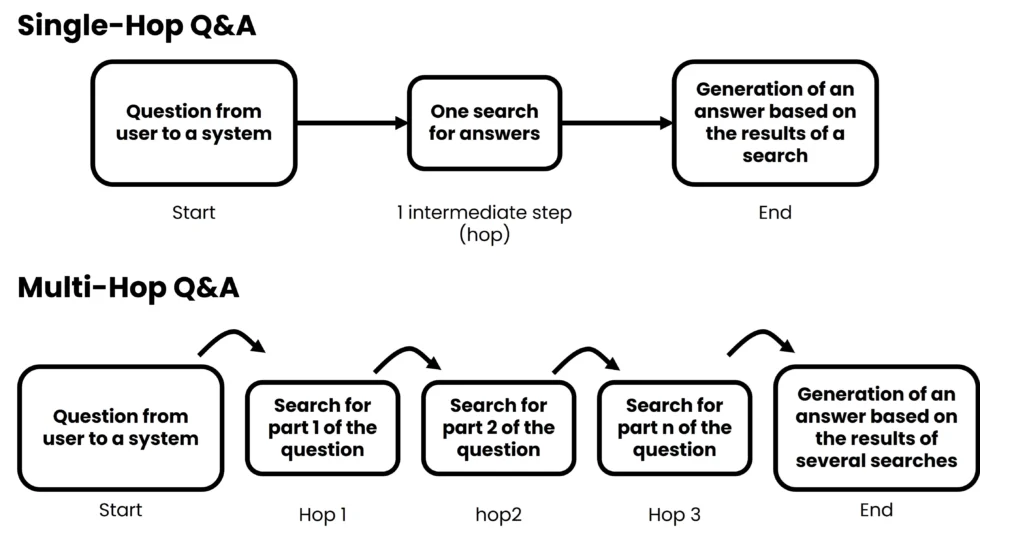

In [12]:
from dsp.utils.utils import deduplicate
import dspy

In [11]:
Retrive =  dspy.Retrieve()
Retrive("Who are the strongest man in the world")

Prediction(
    passages=['The Strongest Man in the World | The Strongest Man in the World is a 1975 Disney film starring Kurt Russell, still a student in the fictional Medfield College. It is the sequel to the 1972 film "Now You See Him, Now You Don\'t", itself a sequel to the 1969 film, "The Computer Wore Tennis Shoes".', 'John Grün | John (Johann) Grün, also known as Herkul Grün (1868–1912), a Luxembourger from Mondorf-les-Bains was believed to be the strongest man in the world at the end of the 19th and beginning of the 20th century.', "2008 World's Strongest Man | The 2008 World's Strongest Man was the 31st edition of World's Strongest Man and was won by Mariusz Pudzianowski from Poland. It was his fifth and record breaking title. Derek Poundstone from the United States finished second, and Dave Ostlund also from the United States finished third after finishing sixth the previous year. The contest was held at Charleston, West Virginia."]
)

In [ ]:
dspy.Predict

In [13]:
class MultiHop(dspy.Module):
    def __init__(self):
        super().__init__()
        self.retrive = dspy.Retrieve(k=3)
        self.generate_query = dspy.ChainOfThought("context, question -> query_string")
        self.generate_answer = dspy.ChainOfThought("context, question -> answer")

    def forward(self, question):
        context = []
        for hop in range(2):
            query = self.generate_query(context=context, question=question).query_string
            print(query)
            retrive = self.retrive(query).passages
            print(retrive)
            context.extend(retrive)
            context = deduplicate(context)
        return self.generate_answer(context=context, question=question).answer

In [14]:
MTH = MultiHop()
MTH("Who are the strongest man in the world")

strongest man competition winners
['1983 World\'s Strongest Man | The 1983 World\'s Strongest Man was the seventh edition of World\'s Strongest Man and was won by Geoff Capes from the United Kingdom. It was his first title. Jón Páll Sigmarsson from the Iceland finished second, and Simon Wulfse from the Netherlands third. The winner of the three previous competetitions, Bill Kazmaier, was not invited to compete again in this year. The contest was held at Christchurch, New Zealand. The title of the competition, formerly "World\'s Strongest Men", was changed to the current title for this competition.', "1998 World's Strongest Man | The 1998 World's Strongest Man was the 21st edition of World's Strongest Man and was won by Magnus Samuelsson from Sweden. It was his first title after finishing third the previous year. 1997 champion Jouko Ahola from Finland finished second, and Wout Zijlstra from the Netherlands finished third. This year had 10 qualifying heats with the winner of each heat go

"The context provides information about the winners of the World's Strongest Man competition in different years. According to the context, the winners are: Geoff Capes (1983), Magnus Samuelsson (1998), and Janne Virtanen (2000)."

In [15]:
turbo.inspect_history()




Given the fields `context`, `question`, produce the fields `answer`.

---

Follow the following format.

Context: ${context}

Question: ${question}

Reasoning: Let's think step by step in order to ${produce the answer}. We ...

Answer: ${answer}

---

Context:
[1] «1983 World's Strongest Man | The 1983 World's Strongest Man was the seventh edition of World's Strongest Man and was won by Geoff Capes from the United Kingdom. It was his first title. Jón Páll Sigmarsson from the Iceland finished second, and Simon Wulfse from the Netherlands third. The winner of the three previous competetitions, Bill Kazmaier, was not invited to compete again in this year. The contest was held at Christchurch, New Zealand. The title of the competition, formerly "World's Strongest Men", was changed to the current title for this competition.»
[2] «1998 World's Strongest Man | The 1998 World's Strongest Man was the 21st edition of World's Strongest Man and was won by Magnus Samuelsson from Sweden. It was h

'\n\n\nGiven the fields `context`, `question`, produce the fields `answer`.\n\n---\n\nFollow the following format.\n\nContext: ${context}\n\nQuestion: ${question}\n\nReasoning: Let\'s think step by step in order to ${produce the answer}. We ...\n\nAnswer: ${answer}\n\n---\n\nContext:\n[1] «1983 World\'s Strongest Man | The 1983 World\'s Strongest Man was the seventh edition of World\'s Strongest Man and was won by Geoff Capes from the United Kingdom. It was his first title. Jón Páll Sigmarsson from the Iceland finished second, and Simon Wulfse from the Netherlands third. The winner of the three previous competetitions, Bill Kazmaier, was not invited to compete again in this year. The contest was held at Christchurch, New Zealand. The title of the competition, formerly "World\'s Strongest Men", was changed to the current title for this competition.»\n[2] «1998 World\'s Strongest Man | The 1998 World\'s Strongest Man was the 21st edition of World\'s Strongest Man and was won by Magnus Sa

In [25]:
from dsp.utils.utils import deduplicate


class MultiHopSearch(dspy.Module):
    def __init__(self):
        super().__init__()
        self.retrieve = dspy.Retrieve(k=3)
        self.generate_query = dspy.ChainOfThought("context, question -> query_string")
        self.generate_answer = dspy.ChainOfThought("context, question -> answer")
    def forward(self, question):
        context = []  #0 3 3
        for hop in range(2):
            query = self.generate_query(context=context, question=question).query_string
            print(query)
            retrieved = self.retrieve(query).passages
            print(retrieved)
            context.extend(retrieved)
            context = deduplicate(context)
        return self.generate_answer(context=context, question=question)


cot_module = MultiHopSearch()
print(cot_module("Who are the strongest men in the world?"))

"Strongest men in the world" ranking based on criteria of strength
["Europe's Strongest Man | Europe's Strongest Man is an annual strength athletics competition which began in 1980. The event is held in various locations throughout Europe, and features exclusively European strongman competitors. Mariusz Pudzianowski currently holds the record for most wins with 6 titles. Zydrunas Savickas, Geoff Capes, Riku Kiri and Hafþór Júlíus Björnsson each hold 3 titles. As of 2010, the Europe's Strongest Man contest has become a part of the Giants Live season of annual grand prix events. The contest serves as a qualifying event for the World's Strongest Man contest, with the top 3 placings qualifying for that year's WSM contest.", "World's Strongest Man | The World's Strongest Man is a strongman competition. Organized by TWI, an IMG Media company, it is broadcast around the end of December each year. Competitors qualify based on placing in the top three at the four to eight Giants Live events eac

In [20]:
turbo.inspect_history(n=1)




Given the fields `context`, `question`, produce the fields `answer`.

---

Follow the following format.

Context: ${context}

Question: ${question}

Reasoning: Let's think step by step in order to ${produce the answer}. We ...

Answer: ${answer}

---

Context:
[1] «The Strongest Man in the World | The Strongest Man in the World is a 1975 Disney film starring Kurt Russell, still a student in the fictional Medfield College. It is the sequel to the 1972 film "Now You See Him, Now You Don't", itself a sequel to the 1969 film, "The Computer Wore Tennis Shoes".»
[2] «2008 World's Strongest Man | The 2008 World's Strongest Man was the 31st edition of World's Strongest Man and was won by Mariusz Pudzianowski from Poland. It was his fifth and record breaking title. Derek Poundstone from the United States finished second, and Dave Ostlund also from the United States finished third after finishing sixth the previous year. The contest was held at Charleston, West Virginia.»
[3] «2003 World's St

'\n\n\nGiven the fields `context`, `question`, produce the fields `answer`.\n\n---\n\nFollow the following format.\n\nContext: ${context}\n\nQuestion: ${question}\n\nReasoning: Let\'s think step by step in order to ${produce the answer}. We ...\n\nAnswer: ${answer}\n\n---\n\nContext:\n[1] «The Strongest Man in the World | The Strongest Man in the World is a 1975 Disney film starring Kurt Russell, still a student in the fictional Medfield College. It is the sequel to the 1972 film "Now You See Him, Now You Don\'t", itself a sequel to the 1969 film, "The Computer Wore Tennis Shoes".»\n[2] «2008 World\'s Strongest Man | The 2008 World\'s Strongest Man was the 31st edition of World\'s Strongest Man and was won by Mariusz Pudzianowski from Poland. It was his fifth and record breaking title. Derek Poundstone from the United States finished second, and Dave Ostlund also from the United States finished third after finishing sixth the previous year. The contest was held at Charleston, West Virg

### 4] Program 1: Basic Retrieval-Augmented Generation (“RAG”)

In [27]:
class GenerateAnswer(dspy.Signature):
    """Answer questions with short factoid answers."""

    context = dspy.InputField(desc="may contain relevant facts")
    question = dspy.InputField()
    answer = dspy.OutputField(desc="often between 1 and 5 words")

In [28]:
class RAG(dspy.Module):
    def __init__(self, num_passages=3):
        super().__init__()

        self.retrieve = dspy.Retrieve(k=num_passages)
        self.generate_answer = dspy.ChainOfThought(GenerateAnswer)
    
    def forward(self, question):
        context = self.retrieve(question).passages
        prediction = self.generate_answer(context=context, question=question)
        return dspy.Prediction(context=context, answer=prediction.answer)

In [31]:
from dspy.teleprompt import BootstrapFewShot

# Validation logic: check that the predicted answer is correct.
# Also check that the retrieved context does actually contain that answer.
def validate_context_and_answer(example, pred, trace=None):
    answer_EM = dspy.evaluate.answer_exact_match(example, pred)
    answer_PM = dspy.evaluate.answer_passage_match(example, pred)
    return answer_EM and answer_PM

# Set up a basic teleprompter, which will compile our RAG program.
teleprompter = BootstrapFewShot(metric=validate_context_and_answer)

# Compile!
compiled_rag = teleprompter.compile(RAG(), trainset=trainset)
compiled_rag.save("weight/compile_rag")

 55%|█████▌    | 11/20 [00:08<00:07,  1.24it/s]


Bootstrapped 4 full traces after 12 examples in round 0.
[('retrieve', <dspy.retrieve.retrieve.Retrieve object at 0x00000208CC92EB00>), ('generate_answer', Predict(StringSignature(context, question -> rationale, answer
    instructions='Answer questions with short factoid answers.'
    context = Field(annotation=str required=True json_schema_extra={'desc': 'may contain relevant facts', '__dspy_field_type': 'input', 'prefix': 'Context:'})
    question = Field(annotation=str required=True json_schema_extra={'__dspy_field_type': 'input', 'prefix': 'Question:', 'desc': '${question}'})
    rationale = Field(annotation=str required=True json_schema_extra={'prefix': "Reasoning: Let's think step by step in order to", 'desc': '${produce the answer}. We ...', '__dspy_field_type': 'output'})
    answer = Field(annotation=str required=True json_schema_extra={'desc': 'often between 1 and 5 words', '__dspy_field_type': 'output', 'prefix': 'Answer:'})
)))]


Now that we've compiled our RAG program, let's try it out.

In [32]:
my_question = "Who are the strongest man"
pred = compiled_rag(my_question)
print(pred.answer)
print(f"Retrieved Contexts (truncated): {[c[:200] + '...' for c in pred.context]}")

N/A
Retrieved Contexts (truncated): ['The Strongest Man in the World | The Strongest Man in the World is a 1975 Disney film starring Kurt Russell, still a student in the fictional Medfield College. It is the sequel to the 1972 film "Now Y...', "2008 World's Strongest Man | The 2008 World's Strongest Man was the 31st edition of World's Strongest Man and was won by Mariusz Pudzianowski from Poland. It was his fifth and record breaking title. D...", "2005 World's Strongest Man | The 2005 World's Strongest Man was the 28th edition of World's Strongest Man and was won by Mariusz Pudzianowski from Poland. It was his third title. Jesse Marunde from th..."]


In [33]:
turbo.inspect_history(n=1)




Answer questions with short factoid answers.

---

Question: At My Window was released by which American singer-songwriter?
Answer: John Townes Van Zandt

Question: "Everything Has Changed" is a song from an album released under which record label ?
Answer: Big Machine Records

Question: In what year was the club founded that played Manchester City in the 1972 FA Charity Shield
Answer: 1874

Question: Which Pakistani cricket umpire who won 3 consecutive ICC umpire of the year awards in 2009, 2010, and 2011 will be in the ICC World Twenty20?
Answer: Aleem Sarwar Dar

Question: Having the combination of excellent foot speed and bat speed helped Eric Davis, create what kind of outfield for the Los Angeles Dodgers?
Answer: "Outfield of Dreams"

Question: Who is older, Aleksandr Danilovich Aleksandrov or Anatoly Fomenko?
Answer: Aleksandr Danilovich Aleksandrov

Question: The Organisation that allows a community to influence their operation or use and to enjoy the benefits arisingwas fou

'\n\n\nAnswer questions with short factoid answers.\n\n---\n\nQuestion: At My Window was released by which American singer-songwriter?\nAnswer: John Townes Van Zandt\n\nQuestion: "Everything Has Changed" is a song from an album released under which record label ?\nAnswer: Big Machine Records\n\nQuestion: In what year was the club founded that played Manchester City in the 1972 FA Charity Shield\nAnswer: 1874\n\nQuestion: Which Pakistani cricket umpire who won 3 consecutive ICC umpire of the year awards in 2009, 2010, and 2011 will be in the ICC World Twenty20?\nAnswer: Aleem Sarwar Dar\n\nQuestion: Having the combination of excellent foot speed and bat speed helped Eric Davis, create what kind of outfield for the Los Angeles Dodgers?\nAnswer: "Outfield of Dreams"\n\nQuestion: Who is older, Aleksandr Danilovich Aleksandrov or Anatoly Fomenko?\nAnswer: Aleksandr Danilovich Aleksandrov\n\nQuestion: The Organisation that allows a community to influence their operation or use and to enjoy t

### 5] Program 2: Multi-Hop Search (“Baleen”)


In [34]:
class GenerateSearchQuery(dspy.Signature):
    """Write a simple search query that will help answer a complex question."""

    context = dspy.InputField(desc="may contain relevant facts")
    question = dspy.InputField()
    query = dspy.OutputField()

Note: We could have written `context = GenerateAnswer.signature.context` to avoid duplicating the description of the `context` field.

Now, let's define the program itself `SimplifiedBaleen`. There are many possible ways to implement this, but we'll keep this version down to the key elements for simplicity.

In [40]:
from dsp.utils import deduplicate
import time
class SimplifiedBaleen(dspy.Module):
    def __init__(self, passages_per_hop=3, max_hops=2):
        super().__init__()

        self.generate_query = [dspy.ChainOfThought(GenerateSearchQuery) for _ in range(max_hops)]
        self.retrieve = dspy.Retrieve(k=passages_per_hop)
        self.generate_answer = dspy.ChainOfThought(GenerateAnswer)
        self.max_hops = max_hops

    def forward(self, question):
        context = []
        for hop in range(self.max_hops):
            query = self.generate_query[hop](context=context, question=question).query
            passages = self.retrieve(query).passages
            context = deduplicate(context + passages)

        pred = self.generate_answer(context=context, question=question)
        return dspy.Prediction(context=context, answer=pred.answer)

In [36]:
# Ask any question you like to this simple RAG program.
my_question = "Who are the strongest men in the world?"

# Get the prediction. This contains `pred.context` and `pred.answer`.
uncompiled_baleen = SimplifiedBaleen()  # uncompiled (i.e., zero-shot) program
pred = uncompiled_baleen(my_question)

# Print the contexts and the answer.
print(f"Question: {my_question}")
print(f"Predicted Answer: {pred.answer}")
print(f"Retrieved Contexts (truncated): {[c[:200] + '...' for c in pred.context]}")
uncompiled_baleen.save("weight/uncompiled_baleen")

Question: Who are the strongest men in the world?
Predicted Answer: Zydrunas Savickas, Jón Páll Sigmarsson, Vasyl Virastyuk, Janne Virtanen, Svend Karlsen, Magnus Samuelsson, Bill Kazmaier, and Hafþór Júlíus Björnsson are some of the strongest men in the world, as they have won the World's Strongest Man competition at least once.
Retrieved Contexts (truncated): ["2014 World's Strongest Man | The 2014 World's Strongest Man was the 37th edition of World's Strongest Man. The event was held at the Commerce Casino in Los Angeles, California, the same host city as t...", "1986 World's Strongest Man | The 1986 World's Strongest Man was the tenth edition of World's Strongest Man and was won by Jón Páll Sigmarsson from Iceland. It was his second title after finishing seco...", "2004 World's Strongest Man | The 2004 World's Strongest Man was the 27th edition of World's Strongest Man and was won by Vasyl Virastyuk from Ukraine. It was his first title after finishing third the ...", "2000 World's 

In [37]:
turbo.inspect_history(n=1)




Answer questions with short factoid answers.

---

Follow the following format.

Context: may contain relevant facts

Question: ${question}

Reasoning: Let's think step by step in order to ${produce the answer}. We ...

Answer: often between 1 and 5 words

---

Context:
[1] «2014 World's Strongest Man | The 2014 World's Strongest Man was the 37th edition of World's Strongest Man. The event was held at the Commerce Casino in Los Angeles, California, the same host city as the 2012 World's Strongest Man contest. The qualifying heats were held from March 22–25 and the finals on March 28 & 29. Unlike previous years when 10 athletes qualified for the finals, this year there were 12 qualifying spots. The top 2 from each heat qualified, as well as the 2 highest scoring 3rd place athletes from all 5 heats. The event was sponsored by the Commerce Casino and will begin broadcasting in the United States on the CBS Sports Network from July 4-August 13, 2014. Zydrunas Savickas from Lithuania fini

"\n\n\nAnswer questions with short factoid answers.\n\n---\n\nFollow the following format.\n\nContext: may contain relevant facts\n\nQuestion: ${question}\n\nReasoning: Let's think step by step in order to ${produce the answer}. We ...\n\nAnswer: often between 1 and 5 words\n\n---\n\nContext:\n[1] «2014 World's Strongest Man | The 2014 World's Strongest Man was the 37th edition of World's Strongest Man. The event was held at the Commerce Casino in Los Angeles, California, the same host city as the 2012 World's Strongest Man contest. The qualifying heats were held from March 22–25 and the finals on March 28 & 29. Unlike previous years when 10 athletes qualified for the finals, this year there were 12 qualifying spots. The top 2 from each heat qualified, as well as the 2 highest scoring 3rd place athletes from all 5 heats. The event was sponsored by the Commerce Casino and will begin broadcasting in the United States on the CBS Sports Network from July 4-August 13, 2014. Zydrunas Savicka

## 5.2 Baleen Complied

In [41]:
def validate_context_and_answer_and_hops(example, pred, trace=None):
    if not dspy.evaluate.answer_exact_match(example, pred): return False
    if not dspy.evaluate.answer_passage_match(example, pred): return False

    hops = [example.question] + [outputs.query for *_, outputs in trace if 'query' in outputs]

    if max([len(h) for h in hops]) > 100: return False
    if any(dspy.evaluate.answer_exact_match_str(hops[idx], hops[:idx], frac=0.8) for idx in range(2, len(hops))): return False

    return True


Like we did for RAG, we'll use one of the most basic teleprompters in **DSPy**, namely, `BootstrapFewShot`.

In [46]:
from dspy.teleprompt import BootstrapFewShot

teleprompter = BootstrapFewShot(metric=validate_context_and_answer_and_hops,max_bootstrapped_demos=10, max_labeled_demos=20)
compiled_baleen = teleprompter.compile(SimplifiedBaleen(), teacher=SimplifiedBaleen(), trainset=trainset)


100%|██████████| 20/20 [00:21<00:00,  1.05s/it]


Bootstrapped 1 full traces after 20 examples in round 0.


In [47]:
pred = compiled_baleen(my_question)
# Print the contexts and the answer.
print(f"Question: {my_question}")
print(f"Predicted Answer: {pred.answer}")
print(f"Retrieved Contexts (truncated): {[c[:200] + '...' for c in pred.context]}")
compiled_baleen.save("weight/compile_baleen")  

Question: Who are the strongest men in the world?
Predicted Answer: Brian Shaw and other top competitors in the World's Strongest Man competitions.
Retrieved Contexts (truncated): ["2016 World's Strongest Man | The 2016 World's Strongest Man was the 39th edition of the World's Strongest Man competition. The event was held in Kasane, Botswana, from August 13–20. It was screened on...", "1983 World's Strongest Man | The 1983 World's Strongest Man was the seventh edition of World's Strongest Man and was won by Geoff Capes from the United Kingdom. It was his first title. Jón Páll Sigmar...", "2015 World's Strongest Man | The 2015 World's Strongest Man was the 38th edition of the World's Strongest Man competition. The event was held in Malaysia, for the first time since 2002. The competitio...", "Brian Shaw (strongman) | Brian Shaw (born February 26, 1982) is an American professional strongman competitor and winner of the 2011, 2013, 2015 and the 2016 World's Strongest Man competitions. Sha

In [48]:
turbo.inspect_history(n=1)




Answer questions with short factoid answers.

---

Question: What is the code name for the German offensive that started this Second World War engagement on the Eastern Front (a few hundred kilometers from Moscow) between Soviet and German forces, which included 102nd Infantry Division?
Answer: Operation Citadel

Question: The Victorians - Their Story In Pictures is a documentary series written by an author born in what year?
Answer: 1950

Question: Which is taller, the Empire State Building or the Bank of America Tower?
Answer: The Empire State Building

Question: In what year was the club founded that played Manchester City in the 1972 FA Charity Shield
Answer: 1874

Question: Samantha Cristoforetti and Mark Shuttleworth are both best known for being first in their field to go where?
Answer: space

Question: At My Window was released by which American singer-songwriter?
Answer: John Townes Van Zandt

Question: Which American actress who made their film debut in the 1995 teen drama

'\n\n\nAnswer questions with short factoid answers.\n\n---\n\nQuestion: What is the code name for the German offensive that started this Second World War engagement on the Eastern Front (a few hundred kilometers from Moscow) between Soviet and German forces, which included 102nd Infantry Division?\nAnswer: Operation Citadel\n\nQuestion: The Victorians - Their Story In Pictures is a documentary series written by an author born in what year?\nAnswer: 1950\n\nQuestion: Which is taller, the Empire State Building or the Bank of America Tower?\nAnswer: The Empire State Building\n\nQuestion: In what year was the club founded that played Manchester City in the 1972 FA Charity Shield\nAnswer: 1874\n\nQuestion: Samantha Cristoforetti and Mark Shuttleworth are both best known for being first in their field to go where?\nAnswer: space\n\nQuestion: At My Window was released by which American singer-songwriter?\nAnswer: John Townes Van Zandt\n\nQuestion: Which American actress who made their film de

## Evaluating

In [49]:
from dspy.evaluate.evaluate import Evaluate

evaluate_on_hotpotqa = Evaluate(
    devset=devset, num_threads=20, display_progress=True, display_table=10
)


def gold_passages_retrieved(example, pred, trace=None):

    gold_titles = set(
        map(dspy.evaluate.normalize_text, example["gold_titles"]))

    found_titles = set(
        map(dspy.evaluate.normalize_text, [
            c.split(" | ")[0] for c in pred.context])
    )

    return gold_titles.issubset(found_titles)

# Compiled RAG

In [50]:
compiled_rag_retrieval_score = evaluate_on_hotpotqa(compiled_rag, metric=gold_passages_retrieved)

  0%|          | 0/50 [00:00<?, ?it/s]

Average Metric: 13 / 50  (26.0): 100%|██████████| 50/50 [00:03<00:00, 12.71it/s]


,question,example_answer,gold_titles,context,pred_answer,gold_passages_retrieved
0,Are both Cangzhou and Qionghai in the Hebei province of China?,no,"{'Qionghai', 'Cangzhou'}","['Cangzhou | Cangzhou () is a prefecture-level city in eastern Hebei province, People\'s Republic of China. At the 2010 census, Cangzhou\'s built-up (""or metro"") area...","No, Qionghai is not located in the Hebei province of China.",False
1,Who conducts the draft in which Marc-Andre Fleury was drafted to the Vegas Golden Knights for the 2017-18 season?,National Hockey League,"{'2017 NHL Expansion Draft', '2017–18 Pittsburgh Penguins season'}",['2017–18 Pittsburgh Penguins season | The 2017–18 Pittsburgh Penguins season will be the 51st season for the National Hockey League ice hockey team that was...,The National Hockey League conducted the draft.,✔️ [True]
2,"The Wings entered a new era, following the retirement of which Canadian retired professional ice hockey player and current general manager of the Tampa Bay...",Steve Yzerman,"{'2006–07 Detroit Red Wings season', 'Steve Yzerman'}","['Steve Yzerman | Stephen Gregory ""Steve"" Yzerman ( ; born May 9, 1965) is a Canadian retired professional ice hockey player and current general manager...",Steve Yzerman,✔️ [True]
3,What river is near the Crichton Collegiate Church?,the River Tyne,"{'Crichton Collegiate Church', 'Crichton Castle'}","[""Crichton Collegiate Church | Crichton Collegiate Church is situated about 0.6 mi south west of the hamlet of Crichton in Midlothian, Scotland. Crichton itself is...",The River Tyne.,✔️ [True]
4,In the 10th Century A.D. Ealhswith had a son called Æthelweard by which English king?,King Alfred the Great,"{'Ealhswith', 'Æthelweard (son of Alfred)'}","[""Æthelweard of East Anglia | Æthelweard (died 854) was a 9th-century king of East Anglia, the long-lived Anglo-Saxon kingdom which today includes the English counties...",King Alfred the Great,False
5,The Newark Airport Exchange is at the northern edge of an airport that is operated by whom?,Port Authority of New York and New Jersey,"{'Newark Liberty International Airport', 'Newark Airport Interchange'}","['Newark Airport Interchange | The Newark Airport Interchange is a massive interchange of Interstate 78, U.S. Route 1-9, U.S. Route 22, New Jersey Route 21,...",The airport is Newark Liberty International Airport and it is operated by the Port Authority of New York and New Jersey.,✔️ [True]
6,Where did an event take place resulting in a win during a domestic double due to the action of a Peruvian footballer known for his...,Bundesliga,"{'2005–06 FC Bayern Munich season', 'Claudio Pizarro'}",['List of Peru international footballers | Peru took part in the inaugural FIFA World Cup in 1930 and enjoyed victories in the 1938 Bolivarian Games...,The context does not provide enough information to answer this question.,False
7,Are both Chico Municipal Airport and William R. Fairchild International Airport in California?,no,"{'Chico Municipal Airport', 'William R. Fairchild International Airport'}","['William R. Fairchild International Airport | William R. Fairchild International Airport (IATA: CLM, ICAO: KCLM, FAA LID: CLM) is a public airport located within the...","No, only Chico Municipal Airport is in California. William R. Fairchild International Airport is in Washington.",✔️ [True]
8,In which Maine county is Fort Pownall located?,"Waldo County, Maine","{'Stockton Springs, Maine', 'Fort Pownall'}","[""Fort Pownall | Fort Pownall was a British fortification built during the French and Indian War, whose remains are located at Fort Point State Park...",Lincoln County,False
9,"Which 90s rock band has more recently reformed, Gene or The Afghan Whigs?",The Afghan Whigs,"{'The Afghan Whigs', 'Gene (band)'}","['The Afghan Whigs | The Afghan Whigs are an American rock band from Cincinnati, Ohio, United States. Originally active from 1986 to 2001, they have...",The Afghan Whigs,False


# Uncompiled Baleen

In [51]:
uncompiled_baleen_retrieval_score = evaluate_on_hotpotqa(uncompiled_baleen, metric=gold_passages_retrieved)

Average Metric: 21 / 50  (42.0): 100%|██████████| 50/50 [00:14<00:00,  3.55it/s]


,question,example_answer,gold_titles,context,pred_answer,gold_passages_retrieved
0,Are both Cangzhou and Qionghai in the Hebei province of China?,no,"{'Qionghai', 'Cangzhou'}","['Cangzhou | Cangzhou () is a prefecture-level city in eastern Hebei province, People\'s Republic of China. At the 2010 census, Cangzhou\'s built-up (""or metro"") area...","No, Qionghai is not located in the Hebei province of China.",False
1,Who conducts the draft in which Marc-Andre Fleury was drafted to the Vegas Golden Knights for the 2017-18 season?,National Hockey League,"{'2017 NHL Expansion Draft', '2017–18 Pittsburgh Penguins season'}","[""Marc-André Fleury | Marc-André Fleury (born November 28, 1984) is a French-Canadian professional ice hockey goaltender playing for the Vegas Golden Knights of the National...",The National Hockey League conducted the draft.,✔️ [True]
2,"The Wings entered a new era, following the retirement of which Canadian retired professional ice hockey player and current general manager of the Tampa Bay...",Steve Yzerman,"{'2006–07 Detroit Red Wings season', 'Steve Yzerman'}","['Steve Yzerman | Stephen Gregory ""Steve"" Yzerman ( ; born May 9, 1965) is a Canadian retired professional ice hockey player and current general manager...",Steve Yzerman.,False
3,What river is near the Crichton Collegiate Church?,the River Tyne,"{'Crichton Collegiate Church', 'Crichton Castle'}","[""Crichton Collegiate Church | Crichton Collegiate Church is situated about 0.6 mi south west of the hamlet of Crichton in Midlothian, Scotland. Crichton itself is...",The River Tyne.,✔️ [True]
4,In the 10th Century A.D. Ealhswith had a son called Æthelweard by which English king?,King Alfred the Great,"{'Ealhswith', 'Æthelweard (son of Alfred)'}",['Beorhtnoð æthling of Kent | Beorhtnoð æthling of Kent was an English ruler of the 9-10th century AD. His father was Burgred of Mercia; his...,The information provided does not specify who Æthelweard's father was.,False
5,The Newark Airport Exchange is at the northern edge of an airport that is operated by whom?,Port Authority of New York and New Jersey,"{'Newark Liberty International Airport', 'Newark Airport Interchange'}","['Newark Liberty International Airport | Newark Liberty International Airport (IATA: EWR, ICAO: KEWR, FAA LID: EWR) , originally Newark Metropolitan Airport and later Newark International...","Newark Liberty International Airport, operated by the Port Authority of New York and New Jersey.",✔️ [True]
6,Where did an event take place resulting in a win during a domestic double due to the action of a Peruvian footballer known for his...,Bundesliga,"{'2005–06 FC Bayern Munich season', 'Claudio Pizarro'}","['Sporting Cristal | Club Sporting Cristal is a Peruvian football team. Based in the Rímac District, in the department of Lima, it plays in the...","Sporting Cristal, in Peru.",False
7,Are both Chico Municipal Airport and William R. Fairchild International Airport in California?,no,"{'Chico Municipal Airport', 'William R. Fairchild International Airport'}","[""Chico Municipal Airport | Chico Municipal Airport (IATA: CIC, ICAO: KCIC, FAA LID: CIC) , often called CMA, is four miles (6 km) north of...","No, Chico Municipal Airport is in California, while William R. Fairchild International Airport is in Washington.",✔️ [True]
8,In which Maine county is Fort Pownall located?,"Waldo County, Maine","{'Stockton Springs, Maine', 'Fort Pownall'}","[""Fort Pownall | Fort Pownall was a British fortification built during the French and Indian War, whose remains are located at Fort Point State Park...",Waldo.,False
9,"Which 90s rock band has more recently reformed, Gene or The Afghan Whigs?",The Afghan Whigs,"{'The Afghan Whigs', 'Gene (band)'}","['The Afghan Whigs | The Afghan Whigs are an American rock band from Cincinnati, Ohio, United States. Originally active from 1986 to 2001, they have...",The Afghan Whigs.,False


# Complied Baleen

In [52]:
compiled_baleen_retrieval_score = evaluate_on_hotpotqa(compiled_baleen, metric=gold_passages_retrieved)

Average Metric: 25 / 50  (50.0): 100%|██████████| 50/50 [00:16<00:00,  3.08it/s]


,question,example_answer,gold_titles,context,pred_answer,gold_passages_retrieved
0,Are both Cangzhou and Qionghai in the Hebei province of China?,no,"{'Qionghai', 'Cangzhou'}","['Cangzhou | Cangzhou () is a prefecture-level city in eastern Hebei province, People\'s Republic of China. At the 2010 census, Cangzhou\'s built-up (""or metro"") area...","No, Qionghai is not in the Hebei province of China.",✔️ [True]
1,Who conducts the draft in which Marc-Andre Fleury was drafted to the Vegas Golden Knights for the 2017-18 season?,National Hockey League,"{'2017 NHL Expansion Draft', '2017–18 Pittsburgh Penguins season'}","[""2017 NHL Expansion Draft | The 2017 NHL Expansion Draft was an expansion draft conducted by the National Hockey League on June 18–20, 2017 to...",The National Hockey League.,False
2,"The Wings entered a new era, following the retirement of which Canadian retired professional ice hockey player and current general manager of the Tampa Bay...",Steve Yzerman,"{'2006–07 Detroit Red Wings season', 'Steve Yzerman'}","[""2006–07 Detroit Red Wings season | The 2006–07 Detroit Red Wings season was the 81st National Hockey League season in Detroit, Michigan. The Wings entered...",Steve Yzerman.,✔️ [True]
3,What river is near the Crichton Collegiate Church?,the River Tyne,"{'Crichton Collegiate Church', 'Crichton Castle'}","[""Crichton Collegiate Church | Crichton Collegiate Church is situated about 0.6 mi south west of the hamlet of Crichton in Midlothian, Scotland. Crichton itself is...",The River Tyne.,✔️ [True]
4,In the 10th Century A.D. Ealhswith had a son called Æthelweard by which English king?,King Alfred the Great,"{'Ealhswith', 'Æthelweard (son of Alfred)'}",['Beorhtnoð æthling of Kent | Beorhtnoð æthling of Kent was an English ruler of the 9-10th century AD. His father was Burgred of Mercia; his...,The context does not provide information about which English king was the father of Æthelweard.,False
5,The Newark Airport Exchange is at the northern edge of an airport that is operated by whom?,Port Authority of New York and New Jersey,"{'Newark Liberty International Airport', 'Newark Airport Interchange'}","['Newark Liberty International Airport | Newark Liberty International Airport (IATA: EWR, ICAO: KEWR, FAA LID: EWR) , originally Newark Metropolitan Airport and later Newark International...",The Newark Airport is operated by the Port Authority of New York and New Jersey.,False
6,Where did an event take place resulting in a win during a domestic double due to the action of a Peruvian footballer known for his...,Bundesliga,"{'2005–06 FC Bayern Munich season', 'Claudio Pizarro'}","['2015 South American Championships in Athletics | The 2015 South American Championships in Athletics (Spanish: ""Campeonato Sudamericano Mayores 2015"" ) was the 49th edition of...",Not enough information to determine.,False
7,Are both Chico Municipal Airport and William R. Fairchild International Airport in California?,no,"{'Chico Municipal Airport', 'William R. Fairchild International Airport'}","['William R. Fairchild International Airport | William R. Fairchild International Airport (IATA: CLM, ICAO: KCLM, FAA LID: CLM) is a public airport located within the...","No, only Chico Municipal Airport is in California.",✔️ [True]
8,In which Maine county is Fort Pownall located?,"Waldo County, Maine","{'Stockton Springs, Maine', 'Fort Pownall'}","[""Fort Pownall | Fort Pownall was a British fortification built during the French and Indian War, whose remains are located at Fort Point State Park...",Waldo County.,✔️ [True]
9,"Which 90s rock band has more recently reformed, Gene or The Afghan Whigs?",The Afghan Whigs,"{'The Afghan Whigs', 'Gene (band)'}","['Congregation (The Afghan Whigs album) | Congregation is the third studio album by American alternative rock band The Afghan Whigs, released on January 31, 1992,...",The Afghan Whigs.,False


In [53]:
print(f"## Retrieval Score for RAG: {compiled_rag_retrieval_score}")  # note that for RAG, compilation has no effect on the retrieval step
print(f"## Retrieval Score for uncompiled Baleen: {uncompiled_baleen_retrieval_score}")
print(f"## Retrieval Score for compiled Baleen: {compiled_baleen_retrieval_score}")

## Retrieval Score for RAG: 26.0
## Retrieval Score for uncompiled Baleen: 42.0
## Retrieval Score for compiled Baleen: 50.0


Excellent! There might be something to this compiled, multi-hop program then. But this is far from all you can do: **DSPy** gives you a clean space of composable operators to deal with any shortcomings you see.

We can inspect a few concrete examples. If we see failure causes, we can:

1. Expand our pipeline by using additional sub-modules (e.g., maybe summarize after retrieval?)
1. Modify our pipeline by using more complex logic (e.g., maybe we need to break out of the multi-hop loop if we found all information we need?)
1. Refine our validation logic (e.g., maybe use a metric that use a second **DSPy** program to do the answer evaluation, instead of relying on strict string matching)
1. Use a different teleprompter to optimize your pipeline more aggressively.
1. Add more or better training examples!


Or, if you really want, we can tweak the descriptions in the Signatures we use in your program to make them more precisely suited for their sub-tasks. This is akin to prompt engineering and should be a final resort, given the other powerful options that **DSPy** gives us!

In [47]:
compiled_baleen("How many storeys are in the castle that David Gregory inherited?")


Prediction(
    context=['David Webster (architect) | David Webster (1885–1952) was a Scottish-Canadian architect best known for his designs of elementary schools in Saskatoon, Saskatchewan, Canada. His school designs were often in a Collegiate Gothic style emphasizing a central tower, locally referred to as a "castle style". Along with other local architects of his era, such as Walter LaChance and Storey and Van Egmond, Webster prospered during the province’s 1912 economic boom which sparked a frenzy of new construction.', 'Castle Hotel, Ruthin | The building is a 3-storey brick construction dating back to the early 18th century. It was originally a coaching inn between Chester and Holyhead, and was known as the White Lion. In 2011, it was purchased by the hotel chain J D Wetherspoon.', 'Roughan Castle | Roughan Castle is a castle a mile outside Newmills, County Tyrone, Northern Ireland, on the Dungannon to Stewartstown road. It was built about 1618 by Sir Andrew Stewart (d.1639), 2nd

In [48]:
turbo.inspect_history(n=1)




Answer questions with short factoid answers.

---

Question: On the coast of what ocean is the birthplace of Diogal Sakho?
Answer: Atlantic

Question: which American actor was Candace Kita guest starred with
Answer: Bill Murray

Question: Which company distributed this 1977 American animated film produced by Walt Disney Productions for which Sherman Brothers wrote songs?
Answer: Buena Vista Distribution

Question: Samantha Cristoforetti and Mark Shuttleworth are both best known for being first in their field to go where?
Answer: space

Question: The Organisation that allows a community to influence their operation or use and to enjoy the benefits arisingwas founded in what year?
Answer: 2010

Question: Which magazine has published articles by Scott Shaw, Tae Kwon Do Times or Southwest Art?
Answer: Tae Kwon Do Times

Question: Which Pakistani cricket umpire who won 3 consecutive ICC umpire of the year awards in 2009, 2010, and 2011 will be in the ICC World Twenty20?
Answer: Aleem Sar

'\n\n\nAnswer questions with short factoid answers.\n\n---\n\nQuestion: On the coast of what ocean is the birthplace of Diogal Sakho?\nAnswer: Atlantic\n\nQuestion: which American actor was Candace Kita guest starred with\nAnswer: Bill Murray\n\nQuestion: Which company distributed this 1977 American animated film produced by Walt Disney Productions for which Sherman Brothers wrote songs?\nAnswer: Buena Vista Distribution\n\nQuestion: Samantha Cristoforetti and Mark Shuttleworth are both best known for being first in their field to go where?\nAnswer: space\n\nQuestion: The Organisation that allows a community to influence their operation or use and to enjoy the benefits arisingwas founded in what year?\nAnswer: 2010\n\nQuestion: Which magazine has published articles by Scott Shaw, Tae Kwon Do Times or Southwest Art?\nAnswer: Tae Kwon Do Times\n\nQuestion: Which Pakistani cricket umpire who won 3 consecutive ICC umpire of the year awards in 2009, 2010, and 2011 will be in the ICC World T